<a href="https://colab.research.google.com/github/ykjoy/mining/blob/main/classification_dt_eval_st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

print(health.columns)
display(health.info())        
display(health.head())     

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


## 종속/독립변수 선택 

In [4]:
#파생변수 생성 
health['BMI'] = round(health['체중(5Kg 단위)']/(health['신장(5Cm단위)']/100)**2, 1) 
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.9
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.9
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.3
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.8


In [5]:
health['비만여부'] = health['BMI'].apply(lambda x : 'Yes' if x >= 25 else 'No' )
health.head()

#new_class = []
#for i in health['BMI'] : 
#  if i >=25:
#    new_class.append('Yes')
#  else:
#    new_class.append('No')
#health['비만여부'] = new_class

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI,비만여부
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.0,No
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.9,Yes
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.9,No
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.3,Yes
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.8,No


No     5944
Yes    4056
Name: 비만여부, dtype: int64


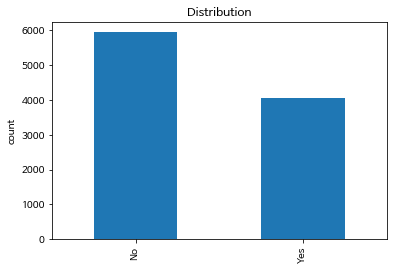

In [6]:
print(health['비만여부'].value_counts())

health['비만여부'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution')
plt.show()

In [7]:
Xy= health[['비만여부', '성별코드', '흡연상태', '음주여부', '연령대코드(5세단위)','식전혈당(공복혈당)' ]]
Xy.head()

#Xy = health.iloc[:, [32, 3, 4, 7, 25, 26]]

,비만여부,성별코드,흡연상태,음주여부,연령대코드(5세단위),식전혈당(공복혈당)
0,No,M,No,No,9,90.0
1,Yes,F,No,No,13,87.0
2,No,F,No,No,12,102.0
3,Yes,M,No,No,13,146.0
4,No,F,No,No,12,110.0


## 데이터 전처리 

In [8]:
print(Xy.shape)
print(Xy.isnull().sum())  #결측치 확인

(10000, 6)
비만여부            0
성별코드            0
흡연상태            2
음주여부            1
연령대코드(5세단위)     0
식전혈당(공복혈당)     88
dtype: int64


In [9]:
Xy_new = Xy.dropna(axis = 0) # NA 삭제
print(Xy_new.shape)
print(Xy_new.isnull().sum())  #결측치 확인

(9909, 6)
비만여부           0
성별코드           0
흡연상태           0
음주여부           0
연령대코드(5세단위)    0
식전혈당(공복혈당)     0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder
cols = ['성별코드', '음주여부', '흡연상태']
Xy_new[cols] = Xy_new[cols].apply(LabelEncoder().fit_transform)
Xy_new.head()

#Xy_new['성별코드'] = LabelEncoder().fit_transform(Xy_new['성별코드'])
#Xy_new['음주여부'] = LabelEncoder().fit_transform(Xy_new['음주여부'])
#Xy_new['흡연상태'] = LabelEncoder().fit_transform(Xy_new['흡연상태'])

#Xy_new["성별코드"].replace('M', 0, inplace='True' )
#Xy_new["성별코드"]=Xy_new["성별코드"].replace('F', 1)
#Xy_new["음주여부"]=Xy_new["음주여부"].replace('Yes', 1)
#Xy_new["음주여부"]=Xy_new["음주여부"].replace('No', 0)

#Xy_new["흡연상태"]=Xy_new["흡연상태"].replace('Yes', 1)
#Xy_new["흡연상태"]=Xy_new["흡연상태"].replace('No', 0)
#Xy_new["흡연상태"]=Xy_new["흡연상태"].replace('NotNow', 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,비만여부,성별코드,흡연상태,음주여부,연령대코드(5세단위),식전혈당(공복혈당)
0,No,1,0,0,9,90.0
1,Yes,0,0,0,13,87.0
2,No,0,0,0,12,102.0
3,Yes,1,0,0,13,146.0
4,No,0,0,0,12,110.0


In [11]:
Xy_new.describe()  

,성별코드,흡연상태,음주여부,연령대코드(5세단위),식전혈당(공복혈당)
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000
mean,0.514986,0.563326,0.585528,11.899082,103.781411
std,0.499801,0.784740,0.492655,2.145050,24.652491
min,0.000000,0.000000,0.000000,9.000000,55.000000
25%,0.000000,0.000000,0.000000,10.000000,91.000000
50%,1.000000,0.000000,1.000000,12.000000,99.000000
75%,1.000000,1.000000,1.000000,13.000000,109.000000
max,1.000000,2.000000,1.000000,18.000000,473.000000


In [12]:
X =  Xy_new.iloc[:, 1:]   
display(X.head())

y = Xy_new.iloc[:, 0]
#y = Xy['종속여부'] 
display(y.head())

,성별코드,흡연상태,음주여부,연령대코드(5세단위),식전혈당(공복혈당)
0,1,0,0,9,90.0
1,0,0,0,13,87.0
2,0,0,0,12,102.0
3,1,0,0,13,146.0
4,0,0,0,12,110.0


0     No
1    Yes
2     No
3    Yes
4     No
Name: 비만여부, dtype: object

## 의사결정나무 (Decision tree) 모델 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth =4, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.615
시험용 데이터 정확도: 0.595


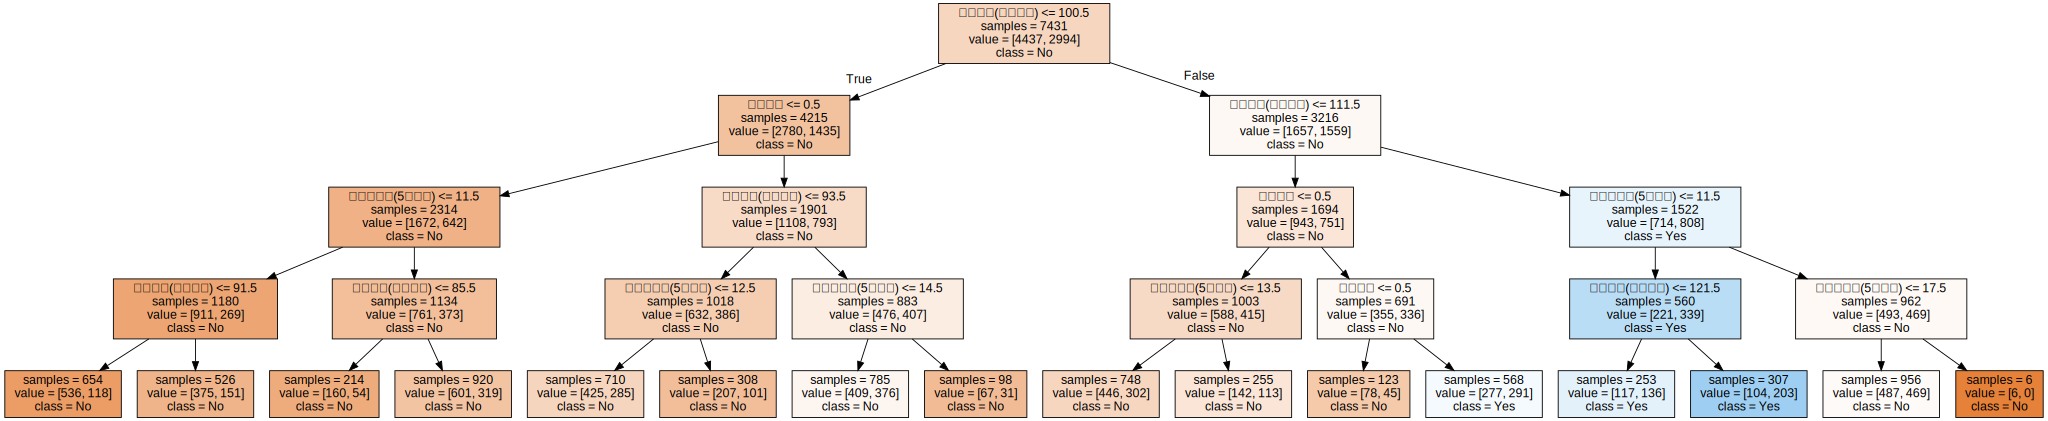

In [14]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["No", "Yes"],
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 주요 변수들 (features)

In [15]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.21447825 0.02263896 0.02283874 0.16850613 0.57153791]


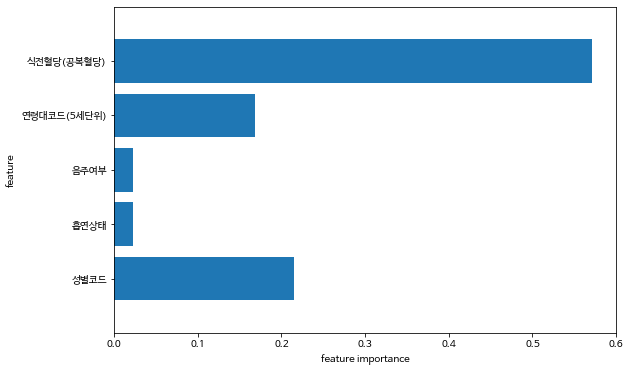

In [23]:
import numpy as np

def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns)  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances(tree)

##랜덤 포레스트 (Random forest)

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.780
시험용 데이터 세트 정확도: 0.567


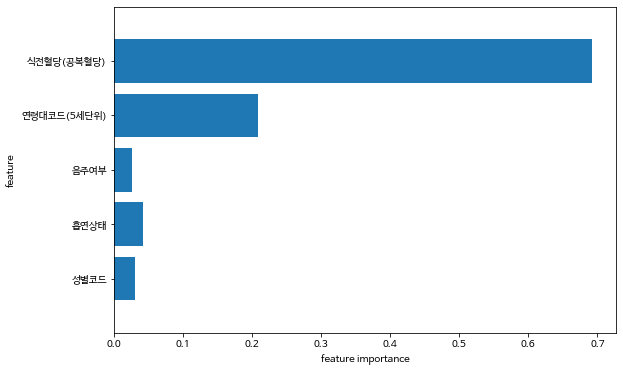

In [24]:
plot_feature_importances(forest)

##그래디언트 부스팅 (Gradient Boosting)


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=0)

In [21]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.623
시험용 데이터 세트 정확도: 0.613


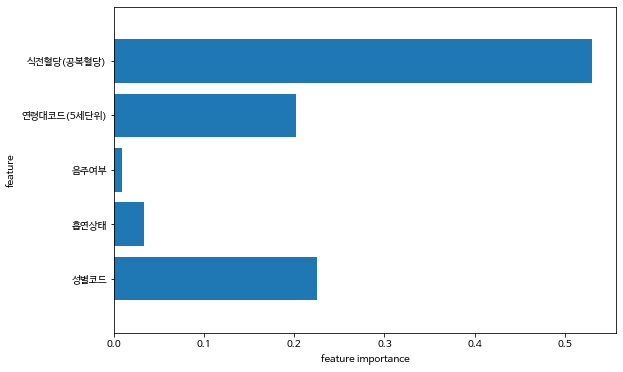

In [25]:
plot_feature_importances(gbrt)

# 분류 모델 평가 (Evaluation)


## 교차 검증 (Cross validation)

In [28]:
from sklearn.model_selection import cross_val_score
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation), default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy mean
Decision tree :0.605
Random forest :0.572
Gradient boosting :0.613


## 그리드 서치 (Grid Search)

In [30]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters1 = {'max_depth':[4, 5]}
parameters2 = {'max_depth':[4, 5], 'n_estimators':[80, 90, 100]}
parameters3 = {'max_depth':[4, 5], 'learning_rate':[0.1,0.08]}

In [33]:
grid_tree = GridSearchCV(tree, param_grid=parameters1, cv=5, refit=True)
grid_tree.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_tree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_tree.best_score_))

grid_forest = GridSearchCV(forest, param_grid=parameters2, cv=5, refit=True)
grid_forest.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_forest.best_score_))

grid_gbrt = GridSearchCV(gbrt, param_grid=parameters3, cv=5, refit=True)
grid_gbrt.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4}
GridSearchCV 최고 정확도: 0.6033
GridSearchCV 최적 파라미터: {'max_depth': 4, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.6119
GridSearchCV 최적 파라미터: {'learning_rate': 0.08, 'max_depth': 4}
GridSearchCV 최고 정확도: 0.6085


In [34]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("tree: 시험용 데이터 세트 정확도: {:.3f}".format(grid_tree.score(X_test, y_test)))
print("forest: 시험용 데이터 세트 정확도: {:.3f}".format(grid_forest.score(X_test, y_test)))
print("gbrt: 시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

tree: 시험용 데이터 세트 정확도: 0.595
forest: 시험용 데이터 세트 정확도: 0.610
gbrt: 시험용 데이터 세트 정확도: 0.608


## 모델 평가 지표

### 정오 분류표 (Confusion matrix)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

dt_pred = grid_tree.predict(X_test)
forest_pred= grid_forest.predict(X_test)
gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, forest_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

Decision tree 시험용 데이터 세트 정확도:0.595
[[1269  182]
 [ 822  205]]
Random forest 시험용 데이터 세트 정확도:0.610
[[1269  182]
 [ 822  205]]
Gradient boosting 시험용 데이터 세트 정확도:0.608
[[1256  195]
 [ 777  250]]


In [38]:
print("Decision tree")
print('정밀도:{:.3f}'.format(precision_score (y_test, dt_pred, average='binary', pos_label="Yes")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, dt_pred, average='binary', pos_label="Yes")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, dt_pred, average='binary', pos_label="Yes")))

print("Random forest")
print('정밀도:{:.3f}'.format(precision_score (y_test, forest_pred, average='binary', pos_label="Yes")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, forest_pred, average='binary', pos_label="Yes")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, forest_pred, average='binary', pos_label="Yes")))

print("Gradienc boosting")
print('정밀도:{:.3f}'.format(precision_score (y_test, gbrt_pred, average='binary', pos_label="Yes")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label="Yes")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, gbrt_pred, average='binary', pos_label="Yes")))


Decision tree
정밀도:0.530
재현율:0.200
f1-measure:0.290
Random forest
정밀도:0.592
재현율:0.191
f1-measure:0.289
Gradienc boosting
정밀도:0.562
재현율:0.243
f1-measure:0.340


### ROC (Receiver Operator Characteristic) 곡선과 AUC (Area Under the Curve)


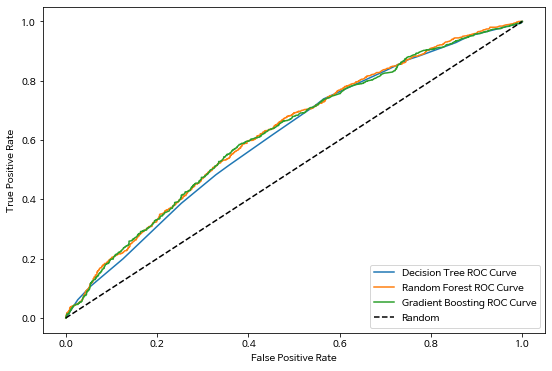

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, grid_tree.predict_proba(X_test)[:, 1], pos_label="Yes")
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, grid_forest.predict_proba(X_test)[:, 1], pos_label="Yes")
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:, 1], pos_label="Yes")

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [42]:
auc_dt = roc_auc_score(y_test, grid_tree.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, grid_forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt)) ## AUC 면적이 가장 큰 모델

Decision Tree의 AUC: 0.612
Random Forest의 AUC: 0.627
Gradient Boosting의 AUC: 0.624
